# German Credit Data

This notebook analyses the London Property Listing dataset

- https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk

### Steps:
- Step 1: Load Data
- Step 2: First 5 rows
- Step 3: Delete Unnecessary Features
- Step 4: Plot Data
- Step 5: Prepare for Modelling
- Step 6: XGBoost

# Step 0: Imports

In [1]:
#============================================
# Imports
import pandas as pd
import numpy as np
import copy
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)
pd.options.display.float_format = '{:,.2f}'.format 

# Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# XGBoost
from xgboost import XGBRegressor

# Model Performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
#============================================

# Step 1: Load Data

In [7]:
#============================================
# Load Data
df=pd.read_csv('german_credit_data.csv')
df.columns = df.columns.str.replace(' ', '_')

# Rename featues
rename_dct = {
    'laufkont' : 'status',
    'laufzeit' : 'duration',
    'moral' : 'credit_history',
    'verw' : 'purpose',
    'hoehe' : 'amount',
    'sparkont' : 'savings',
    'beszeit' : 'employment_duration',
    'rate' : 'installment_rate',
    'famges' : 'personal_status_sex',
    'buerge' : 'other_debtors',
    'wohnzeit' : 'present_residence',
    'verm' : 'property',
    'alter' : 'age',
    'weitkred' : 'other_installment_plans',
    'wohn' : 'housing',
    'bishkred' : 'number_credits',
    'beruf' : 'job',
    'pers' : 'people_liable',
    'telef' : 'telephone',
    'gastarb' : 'foreign_worker',
    'kredit' : 'credit_risk'
}
df = df.rename(columns=rename_dct)

# Mapp features
map_status={
1 : 'no_checking_account',
2 : '(-inf, 0)',
3 : '[0, 200)',
4 : '[200, inf)'}

map_credit_history={
0 : 'delay in paying off in the past',
1 : 'critical account/other credits elsewhere',
2 : 'no credits taken/all credits paid back duly',
3 : 'existing credits paid back duly till now',
4 : 'all credits at this bank paid back duly'}

map_purpose={
0 : 'others',
1 : 'car(new)',
2 : 'car(used)',
3 : 'furniture_equipment',
4 : 'radio_television',
5 : 'domestic appliances',
6 : 'repairs',
7 : 'education',
8 : 'vacation',
9 : 'retraining',
10 : 'business'}

map_savings={
1 : 'unknown/no_savings_account',
2 : '(-inf,100))',
3 : '[100,500)',
4 : '[500,1000)',
5 : '[1000,inf)'}

map_employment_duration={
1 : 'unemployed',
2 : '[0,1)',
3 : '[1,4)',
4 : '[4,7)',
5 : '[7,inf)'}

map_installment_rate={
1 : '[35,inf)',
2 : '[25,35)',
3 : '[20,25)',
4 : '(-inf,20)'}

map_personal_status_sex={
1 : 'male_divorcedseparated',
2 : 'femalenonsingle_or_malesingle',
3 : 'male_marriedwidowed',
4 : 'female_single'}

map_other_debtors={
1 : 'none',
2 : 'coapplicant',
3 : 'guarantor'}

map_present_residence={
1 : '[0,1)',
2 : '[1,4)',
3 : '[4,7)',
4 : '[7,inf)'}

map_property={
1 : 'unknown_noproperty',
2 : 'car_or_other',
3 : 'buildingsoc_savingsagr_lifeinsurance',
4 : 'realestate'}

map_other_installment_plans={
1 : 'bank',
2 : 'stores',
3 : 'none'}

map_housing={
1 : 'forfree',
2 : 'rent',
3 : 'own'}

map_number_credits={
1 : '[0,1]',
2 : '[2,3]',
3 : '[4,5]',
4 : '[6,inf)'}

map_job={
1 : 'unemployedunskilled_nonresident',
2 : 'unskilled_resident',
3 : 'skilledemployee_official',
4 : 'manager_selfempl_highlyqualif_employee'}

map_people_liable={
1 : '[3,inf)',
2 : '[0,2]'}

map_telephone={
1 : 'no',
2 : 'yes'}

map_foreign_worker={
1 : 'yes',
2 : 'no'}

df['status']                  = df['status'].map(map_status)
df['credit_history']          = df['credit_history'].map(map_credit_history)
df['purpose']                 = df['purpose'].map(map_purpose)
df['savings']                 = df['savings'].map(map_savings)
df['employment_duration']     = df['employment_duration'].map(map_employment_duration)
df['installment_rate']        = df['installment_rate'].map(map_installment_rate)
df['personal_status_sex']     = df['personal_status_sex'].map(map_personal_status_sex)
df['other_debtors']           = df['other_debtors'].map(map_other_debtors)
df['present_residence']       = df['present_residence'].map(map_present_residence)
df['property']                = df['property'].map(map_property)
df['other_installment_plans'] = df['other_installment_plans'].map(map_other_installment_plans)
df['housing']                 = df['housing'].map(map_housing)
df['number_credits']          = df['number_credits'].map(map_number_credits)
df['job']                     = df['job'].map(map_job)
df['people_liable']           = df['people_liable'].map(map_people_liable)
df['telephone']               = df['telephone'].map(map_telephone)
df['foreign_worker']          = df['foreign_worker'].map(map_foreign_worker)

print('--------------------')
print('## Information ##')
df.info()
print('--------------------')
print('')
#============================================

--------------------
## Information ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  ho

# Step 2: First 5 rows

In [9]:
#============================================
# First 5 rows
print('--------------------')
print('## First 5 rows ##')
print(df.head(5))
print('--------------------')
#============================================

--------------------
## First 5 rows ##
                status  duration                               credit_history  \
0  no_checking_account        18      all credits at this bank paid back duly   
1  no_checking_account         9      all credits at this bank paid back duly   
2            (-inf, 0)        12  no credits taken/all credits paid back duly   
3  no_checking_account        12      all credits at this bank paid back duly   
4  no_checking_account        12      all credits at this bank paid back duly   

      purpose  amount                     savings employment_duration  \
0   car(used)    1049  unknown/no_savings_account               [0,1)   
1      others    2799  unknown/no_savings_account               [1,4)   
2  retraining     841                 (-inf,100))               [4,7)   
3      others    2122  unknown/no_savings_account               [1,4)   
4      others    2171  unknown/no_savings_account               [1,4)   

  installment_rate            pers

# Step 3: Next



# Step 4: Plot Data

### Response [credit_risk]

xx

### Numerical Features [xxx]

xx

### Categorical Featues [xx]

x

,credit_risk,count
0,1,700
1,0,300


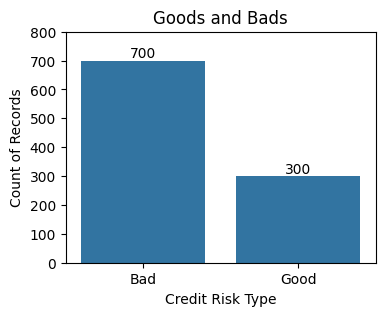

In [21]:
#============================================
# Plot Response

df_smry=df['credit_risk'].value_counts().reset_index()
df_smry['credit_risk']=df_smry['credit_risk'].map({0:'Good', 1:'Bad'})


plt.figure(figsize=(4,3))
ax=sns.barplot(df_smry, x='credit_risk', y='count')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Credit Risk Type')
ax.set_ylabel('Count of Records')
plt.ylim(0, 800) 
plt.title('Goods and Bads')
plt.show()


#============================================

In [19]:
df_smry

,credit_risk,count
0,1,700
1,0,300


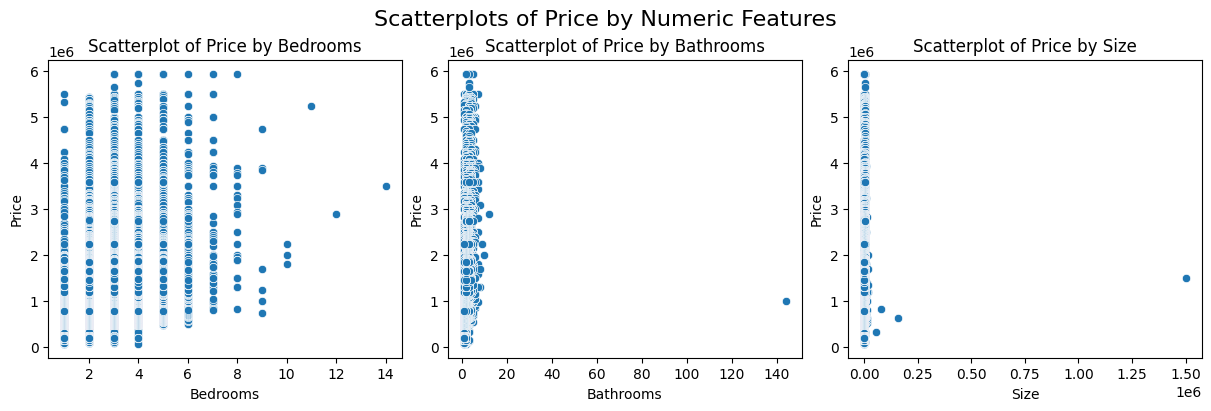

In [336]:
#============================================
# Plot Numeric Features

# Numeric Features
numeric_cols = df2.select_dtypes(include=[np.number]).columns.drop('Price')
num_numeric_cols=len(numeric_cols)

# Scatterplots
fig, axes = plt.subplots(1, num_numeric_cols, figsize=(12, 4), constrained_layout=True)
for i, this_var in enumerate(numeric_cols):
    sns.scatterplot(data=df2, 
                    x=this_var, 
                    y='Price', 
                    ax=axes[i])
    axes[i].set_title(f'Scatterplot of Price by {this_var}', fontsize=12)
fig.suptitle('Scatterplots of Price by Numeric Features', fontsize=16)
plt.show()
#============================================

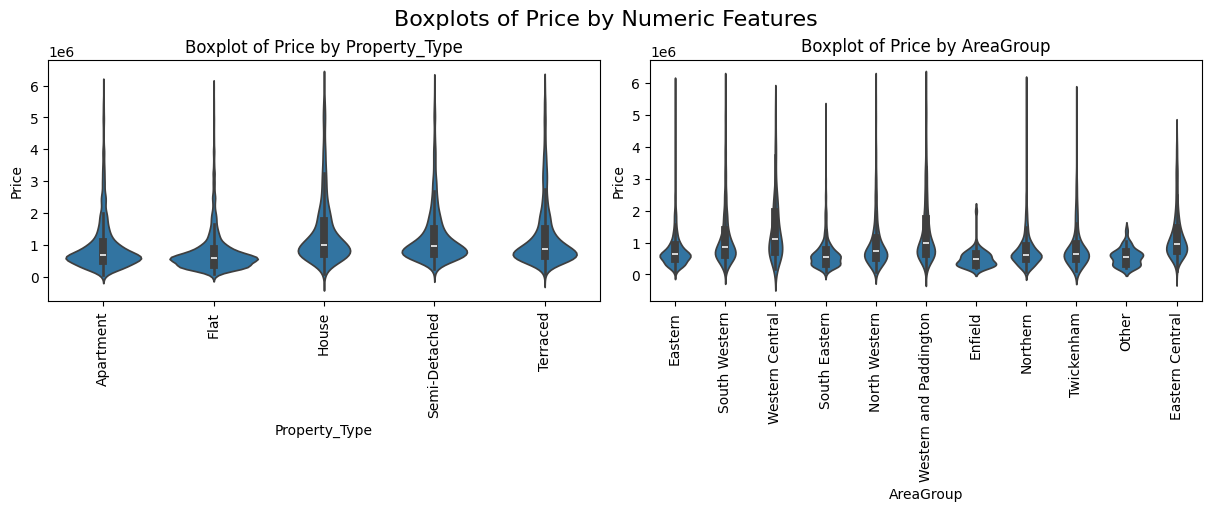

In [337]:
#============================================
# Plot Categorical Features

# Categorical Features
categorical_cols = df2.select_dtypes(exclude=[np.number]).columns
num_categorical_cols=len(categorical_cols)


# Scatterplots
fig, axes = plt.subplots(1, num_categorical_cols, figsize=(12, 5), constrained_layout=True)
for i, this_var in enumerate(categorical_cols):
    sns.violinplot(data=df2, 
                    x=this_var, 
                    y='Price', 
                    ax=axes[i])
    axes[i].set_title(f'Boxplot of Price by {this_var}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90) 
fig.suptitle('Boxplots of Price by Numeric Features', fontsize=16)
plt.show()
#============================================

In [338]:
#============================================
# Delete Outliers

# Step 6a: 1 bedroom appartment, 144 bathrooms
print('--------------------')
print('## Outlier Bathrooms ##')
print(df2[df2['Bathrooms']>=20])
print('--------------------')
print('')
df2=df2[df2['Bathrooms']<20]
#============================================

--------------------
## Outlier Bathrooms ##
           Price Property_Type  Bedrooms  Bathrooms   Size AreaGroup
14886 999,000.00     Apartment      1.00     144.00 535.00  Northern
--------------------



In [339]:
#============================================
# 1, 3 and 5 bedroom appartments, sizes over 50,000 sq feet
print('--------------------')
print('## Outlier Size ##')
print(df2[df2['Size']>=50E3])
print('--------------------')
print('')
df2=df2[df2['Size']<50E3]
#============================================

--------------------
## Outlier Size ##
             Price  Property_Type  Bedrooms  Bathrooms         Size  \
3713    325,000.00           Flat      1.00       1.00    53,798.00   
11956   830,000.00      Apartment      1.00       1.00    78,797.00   
18886 1,500,000.00       Terraced      3.00       1.00 1,500,000.00   
24857   640,000.00  Semi-Detached      5.00       2.00   158,295.00   

           AreaGroup  
3713         Eastern  
11956  South Western  
18886        Eastern  
24857        Enfield  
--------------------



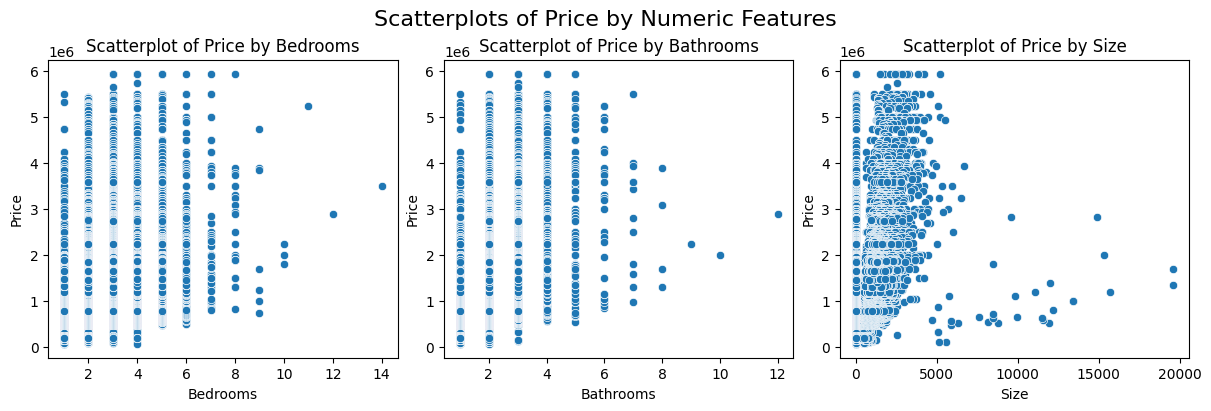

In [340]:
#============================================
# Plot Numeric Features

# Numeric Features
numeric_cols = df2.select_dtypes(include=[np.number]).columns.drop('Price')
num_numeric_cols=len(numeric_cols)

# Scatterplots
fig, axes = plt.subplots(1, num_numeric_cols, figsize=(12, 4), constrained_layout=True)
for i, this_var in enumerate(numeric_cols):
    sns.scatterplot(data=df2, 
                    x=this_var, 
                    y='Price', 
                    ax=axes[i])
    axes[i].set_title(f'Scatterplot of Price by {this_var}', fontsize=12)
fig.suptitle('Scatterplots of Price by Numeric Features', fontsize=16)
plt.show()
#============================================

# Step 5: Prepare for Modelling

Undertake the following:

- one-hot dummy encoding of categorical featuers
- train-test split

In [341]:
# One-Hot Encoding
keeps=['Price', 'Bedrooms', 'Bathrooms', 'Size']
keeps=df2.columns

df3=copy.deepcopy(pd.get_dummies(df2[keeps],dtype=int))
df3.columns=df3.columns.str.replace('-', '_').str.replace(' ', '_')

# X and y
X=df3.drop(['Price'], axis=1)
y=df3['Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: XGBoost

In [364]:
# Fit the XGBoost Model
model_xgb = XGBRegressor(
    max_depth=10, 
    min_child_weight=20,
    n_estimators=1000, 
    learning_rate=0.1, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    seed=7)
model_xgb.fit(X_train, y_train)

# Predicted and Actual Prices
pred_train_xgb=pd.DataFrame({'Split': 'Train', 'Price': y_train, 'pred_xgb': model_xgb.predict(X_train).round(0)})
pred_test_xgb=pd.DataFrame({'Split': 'Test',   'Price': y_test,  'pred_xgb': model_xgb.predict(X_test).round(0)})
pred=pd.concat([pred_train_xgb, pred_test_xgb],axis=0).reset_index(drop=True)

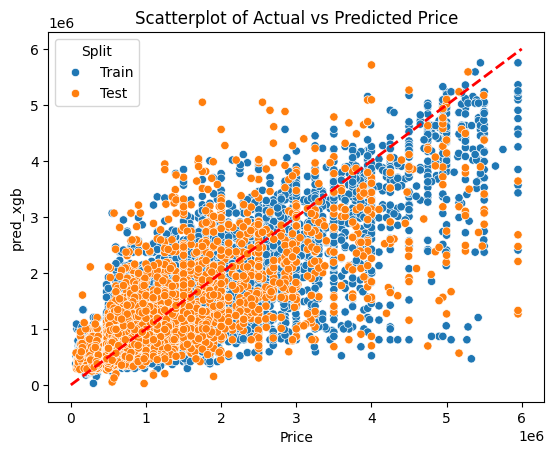

In [365]:
# Results
sns.scatterplot(data=pred, x='Price', y='pred_xgb', hue='Split')
plt.title('Scatterplot of Actual vs Predicted Price')
plt.plot([0, 6e6], [0, 6e6], color='red', linestyle='--', linewidth=2, label='45-degree line')
plt.show()

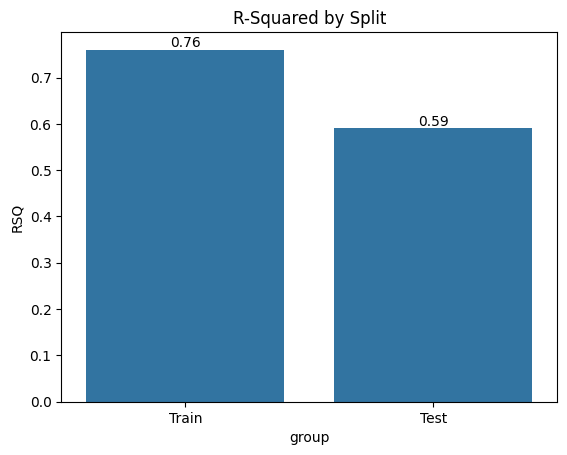

In [366]:
# R-Squared
def r2_score_group(y_true=None, y_pred=None, group=None, round=2):
    """
    Calculate RSQ for each group
    """
    levels=group.unique()
    values=[]
    for this_level in levels:
        this_y_true=y_true[group==this_level]
        this_y_pred=y_pred[group==this_level]
        values.append(r2_score(y_true=this_y_true, y_pred=this_y_pred))
    return pd.DataFrame({'group':levels, 'RSQ':values}).round(round)

df_rsq=r2_score_group(y_true=pred['Price'], y_pred=pred['pred_xgb'], group=pred['Split'])

ax=sns.barplot(data=df_rsq, x='group', y='RSQ')
ax.bar_label(ax.containers[0])
plt.title('R-Squared by Split')
plt.show()